In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv(r"../data/model_training_data.csv")
    
x = data.drop(['target'],axis=1)
y = data.target.to_numpy()
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=60)

In [6]:
x_test.head()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
10,16.02,23.24,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697
81,13.34,15.86,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902
378,13.66,15.15,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897
207,17.01,20.26,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223
401,11.93,10.91,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541


# Creating Models

In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [8]:
rfc = RandomForestClassifier(max_depth=3)
rfc_model = rfc.fit(x_train,y_train)

In [9]:
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Testing Accuracy

In [10]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

0.8991


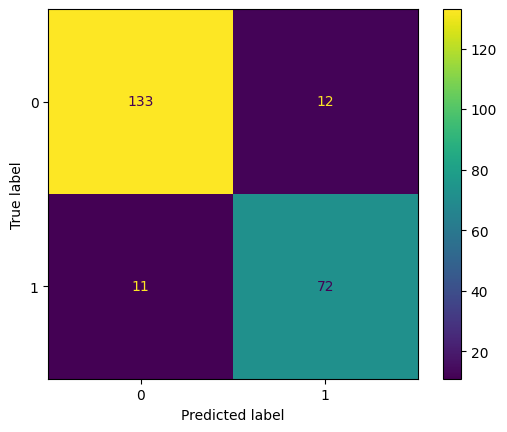

In [11]:
lr_ypred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_ypred)
print("{:.4f}".format(lr_acc))

cm = confusion_matrix(lr_ypred, y_test, labels=lr.classes_)
lr_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
lr_display.plot()

0.9474


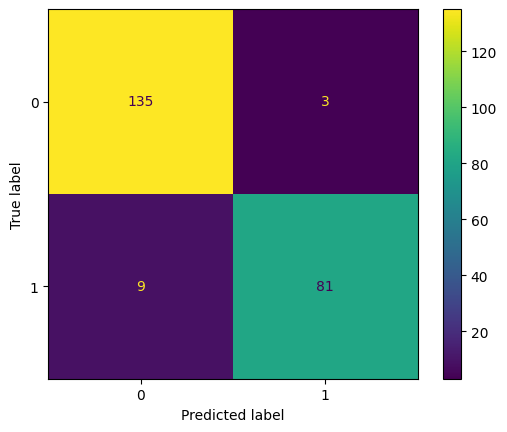

In [12]:
rfc_ypred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_ypred)
print("{:.4f}".format(rfc_acc))

rfc_cm = confusion_matrix(rfc_ypred, y_test, labels=rfc.classes_)
rfc_display = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc.classes_)
rfc_display.plot()

0.9386


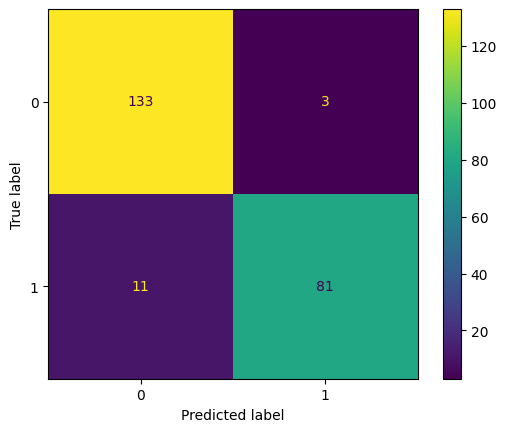

In [13]:
xgb_ypred = xgb.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_ypred)
print("{:.4f}".format(xgb_acc))

xgb_cm = confusion_matrix(xgb_ypred, y_test, labels=xgb.classes_)
xgb_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb.classes_)
xgb_display.plot()

In [14]:
rfc_acc==xgb_acc

False

In [15]:
len(xgb_ypred)

228

In [16]:
xgb_ypred==rfc_ypred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

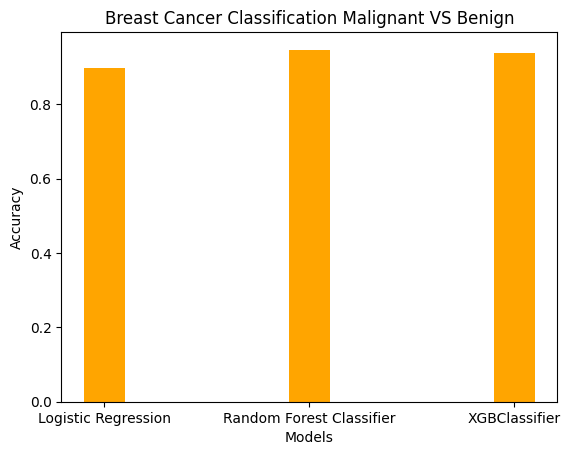

In [17]:
category = ["Logistic Regression", "Random Forest Classifier", "XGBClassifier"]
values = [lr_acc, rfc_acc, xgb_acc]
plt.bar(category, values, width=0.2, align='center',color='orange')
plt.title("Breast Cancer Classification Malignant VS Benign")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Pickle the model

In [18]:
import pickle
file_path = "random_forest_model.pkl"
with open(file_path, "wb") as file:
    pickle.dump(rfc_model, file)


# Loading pickle file

In [19]:
with open(file_path, "rb") as file:
    loaded_model = pickle.load(file)

to_predict = np.asarray([ 9.43472803,12.45832749,274.02228468,0.14608324,0.02698441,0.03688407,0.01487025,0.23949718,0.12250468])


In [20]:
type(to_predict)

numpy.ndarray

In [21]:
to_predict = to_predict.reshape(1,-1)
to_predict.shape

(1, 9)

In [23]:
loaded_model.predict(to_predict)

c:\Users\piyus\code\ml\Breast-Cancer-Classification-WisconsinDiagnosticUCI\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)